In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

In [55]:
def Bisection(f, a, b, args=(), eps=1.0e-3):
    assert f(a, *args)*f(b, *args)<0 , "must be f(a)f(b)<0"
    x1, x2 = a, b
    for iter in range(100):
        x = 0.5*(x1 + x2)
        if abs(f(x, *args))<eps:
            return x
        if f(a, *args)*f(x, *args)<0:
            x2 = x
        else:
            x1 = x

In [56]:
def f(x, args):
    alpha = args
    return np.sin(alpha*x)
print(Bisection(f, a=2.5, b=4.0, args=(1.0,)))

3.1416015625


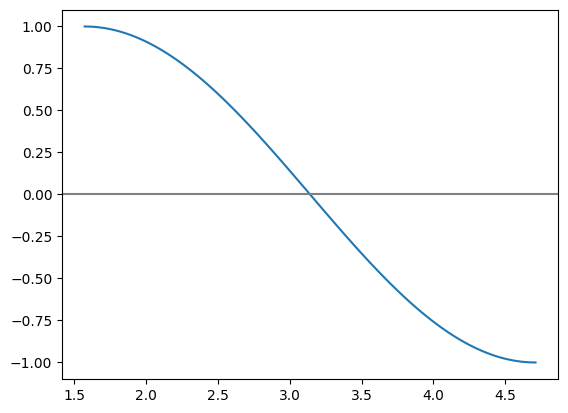

In [6]:
x = np.linspace(0.5*np.pi, 1.5*np.pi,100)
y = np.sin(x)
plt.plot(x, y)
plt.axhline(y=0, color="gray")
plt.show()

In [57]:
def Newton(f, fp, a, args=(), eps=1.0e-3):
    x1 = a
    for iter in range(100):
        x = x1 - f(x1, *args)/fp(x1, *args)
        if abs(f(x, *args))<eps:
            return x
        else:
            x1 = x

In [66]:
def f(x, args):
    alpha = args
    return x*x*jv(0, x) + alpha*jv(2, x)

def fp(x, args):
    alpha = args
    return 2.0*x*jv(0, x) - x*x*jv(1, x) + 0.5*alpha*(jv(1, x) - jv(3, x))

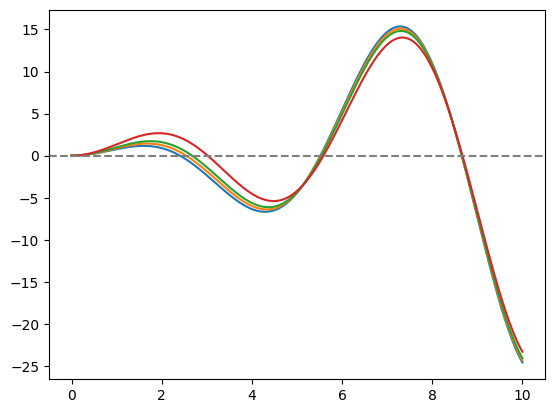

In [67]:
x = np.linspace(0.0, 10.0, 250)
y0 = f(x, args=(0.0,))
y1 = f(x, args=(1.0,))
y2 = f(x, args=(2.0,))
y5 = f(x, args=(5.0,))
plt.plot(x, y0)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y5)
plt.axhline(y=0, color="gray", linestyle="--")
plt.show()

In [62]:
print(Bisection(f, 2.0, 3.5, args=(0.0,), eps=1.0e-5))
print(Bisection(f, 2.0, 3.5, args=(1.0,), eps=1.0e-5))
print(Bisection(f, 2.0, 3.5, args=(2.0,), eps=1.0e-5))
print(Bisection(f, 2.0, 3.5, args=(5.0,), eps=1.0e-5))

2.4048233032226562
2.5436744689941406
2.6735591888427734
3.019725799560547


In [65]:
print(Newton(f, fp, 2.0, args=(0.0,), eps=1.0e-5))
print(Newton(f, fp, 2.0, args=(1.0,), eps=1.0e-5))
print(Newton(f, fp, 2.0, args=(2.0,), eps=1.0e-5))
print(Newton(f, fp, 2.5, args=(5.0,), eps=1.0e-5))

2.4048256232637484
2.5436762956288774
2.6735580050774814
3.0197249898102783
